In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

100%|██████████| 780k/780k [00:00<00:00, 59.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1


Path to dataset files: /root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv(path + '/kc_house_data.csv')

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Initialization

In [6]:
df.drop(columns=['id', 'date'], inplace=True)

In [7]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [9]:
df.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
grade,0


In [10]:
df.nunique()

,0
price,4028
bedrooms,13
bathrooms,30
sqft_living,1038
sqft_lot,9782
floors,6
waterfront,2
view,5
condition,5
grade,12


# EDA

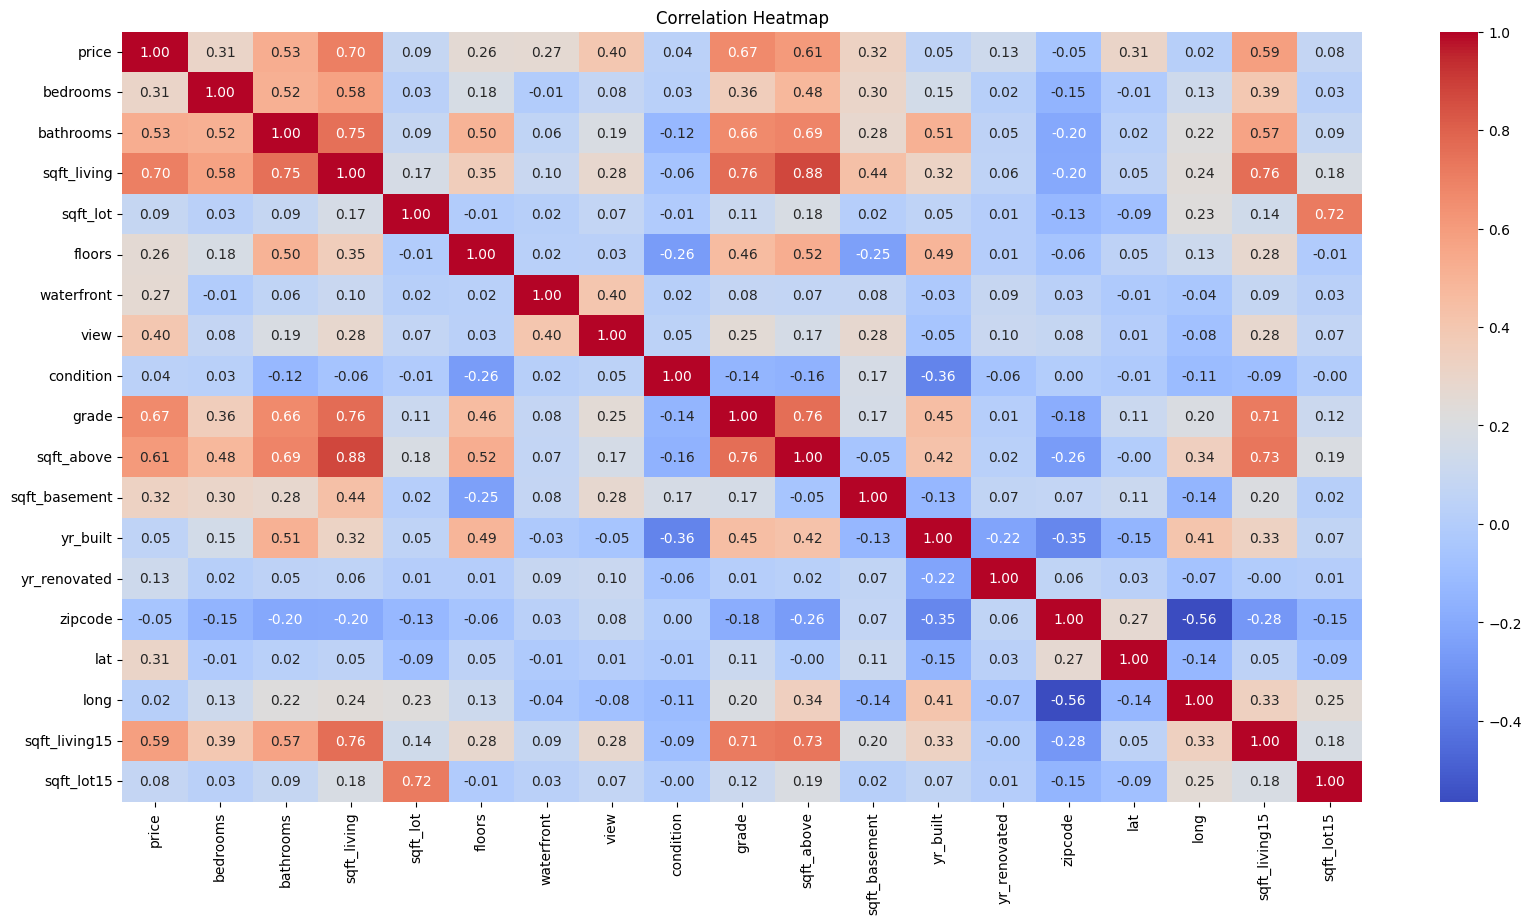

In [45]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

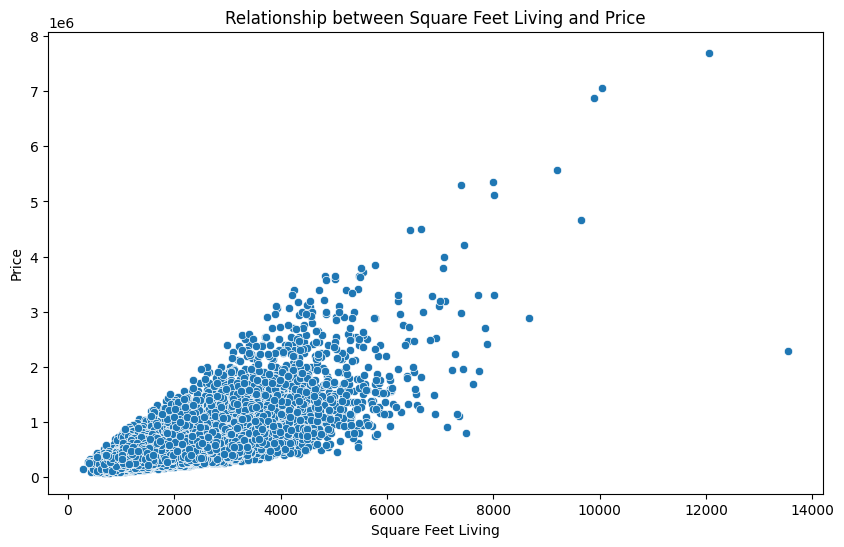

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.xlabel('Square Feet Living')
plt.ylabel('Price')
plt.title('Relationship between Square Feet Living and Price')
plt.show()

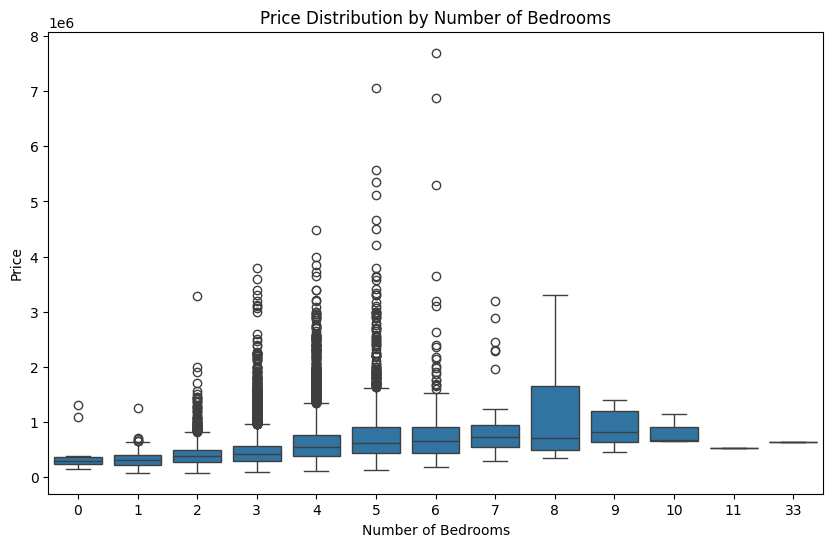

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Bedrooms')
plt.show()

Text(0.5, 1.0, 'Price Distribution by Number of Bathrooms')

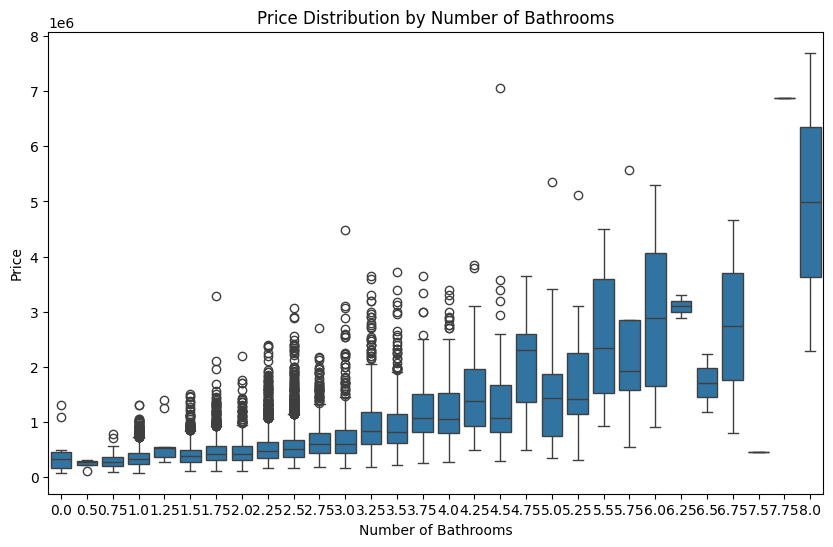

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Bathrooms')

Text(0.5, 1.0, 'Price Distribution by Number of Floors')

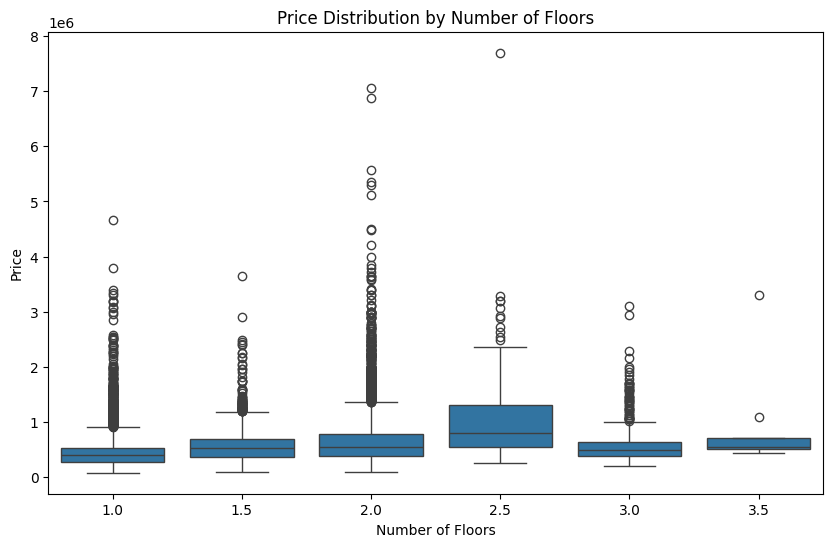

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='floors', y='price', data=df)
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Floors')

Text(0.5, 1.0, 'Price Distribution by Waterfront View')

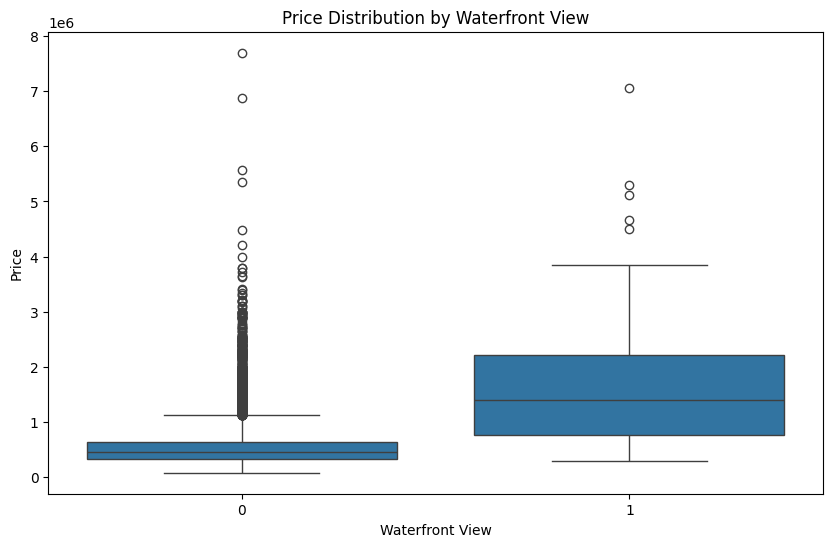

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.title('Price Distribution by Waterfront View')

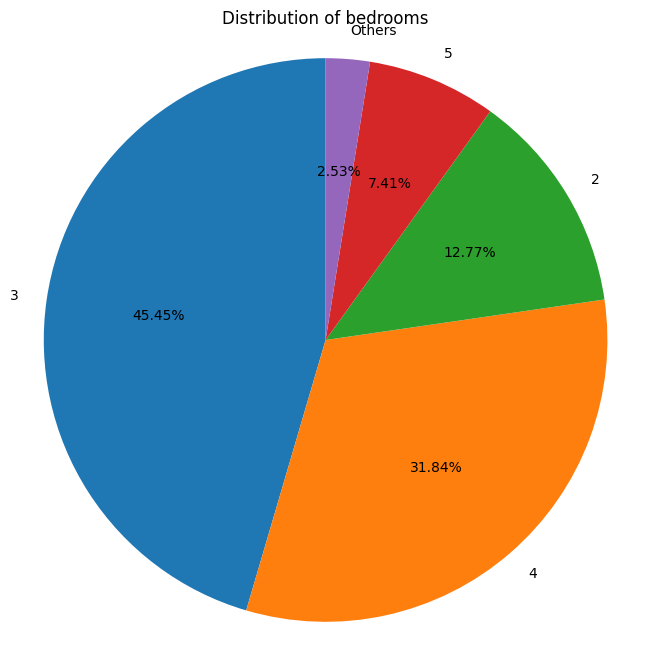

In [51]:
def create_pie_chart_with_others(df, column_name):
    value_counts = df[column_name].value_counts()
    percentages = value_counts / len(df) * 100

    others = percentages[percentages < 7].sum()
    filtered_percentages = percentages[percentages >= 7]
    filtered_percentages['Others'] = others

    plt.figure(figsize=(8, 8))
    plt.pie(filtered_percentages, labels=filtered_percentages.index, autopct='%.2f%%', startangle=90)
    plt.title(f'Distribution of {column_name}')
    plt.axis('equal')
    plt.show()

create_pie_chart_with_others(df, 'bedrooms')


# Preprocess Data

In [39]:
X = df['sqft_living']
y = df['price']

In [42]:
scaler = MinMaxScaler()

In [43]:
X_normalized = scaler.fit_transform(X.values.reshape(-1, 1))
y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))

In [44]:
X_normalized

array([[0.06716981],
       [0.17207547],
       [0.03622642],
       ...,
       [0.05509434],
       [0.09886792],
       [0.05509434]])

# Linear Regression from Library

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(X_normalized, y_normalized)

LinearRegression()

In [59]:
y_pred = lr.predict(X_normalized)

In [60]:
mse = mean_squared_error(y_normalized, y_pred)
r2 = r2_score(y_normalized, y_pred)

In [63]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0011756200906515857
R-squared: 0.492853217903793


Mean Squared Error: 0.0011756200906515857
R-squared: 0.492853217903793


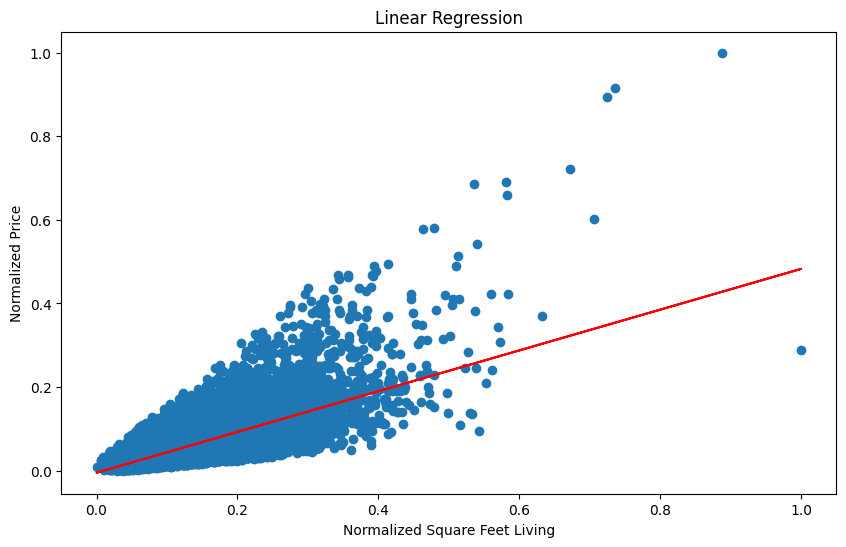

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized, y_normalized, label='Actual')
plt.plot(X_normalized, y_pred, color='red', label='Predicted')
plt.xlabel('Normalized Square Feet Living')
plt.ylabel('Normalized Price')
plt.title('Linear Regression')
plt.show()

# Linear Regression from Scratch

In [130]:
class LinearRegression:
    def __init__(self, learning_rate=0.10, n_iterations=5000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [131]:
custom_lr = LinearRegression(learning_rate=0.1, n_iterations=5000)
custom_lr.fit(X_normalized, y_normalized.ravel())

In [132]:
y_pred_custom = custom_lr.predict(X_normalized)

In [133]:
mse_custom = mean_squared_error(y_normalized, y_pred_custom)
r2_custom = r2_score(y_normalized, y_pred_custom)
print(f"Custom Linear Regression - Mean Squared Error: {mse_custom}")
print(f"Custom Linear Regression - R-squared: {r2_custom}")

Custom Linear Regression - Mean Squared Error: 0.0011854764591023043
Custom Linear Regression - R-squared: 0.4886013123922378


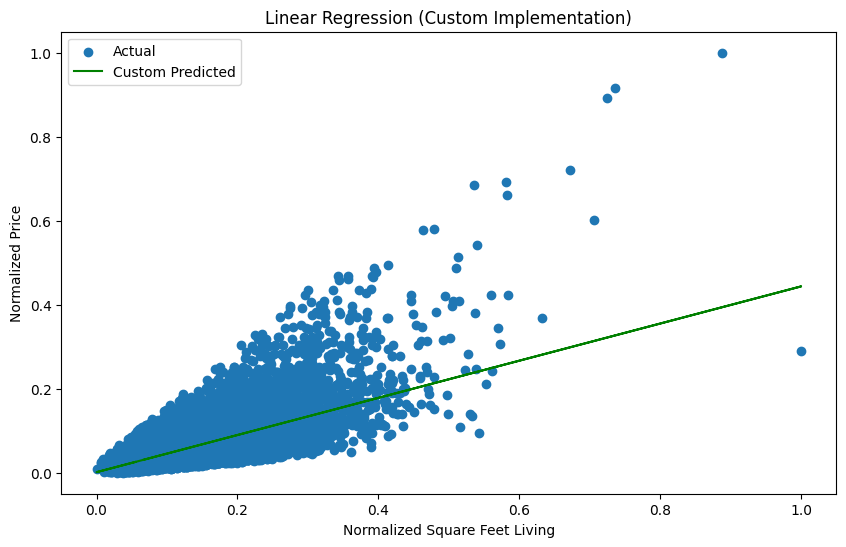

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized, y_normalized, label='Actual')
plt.plot(X_normalized, y_pred_custom, color='green', label='Custom Predicted')
plt.xlabel('Normalized Square Feet Living')
plt.ylabel('Normalized Price')
plt.title('Linear Regression (Custom Implementation)')
plt.legend()
plt.show()


# Comparison

In [136]:
print("Library Linear Regression - Mean Squared Error:", mse)
print("Library Linear Regression - R-squared:", r2)
print("Custom Linear Regression - Mean Squared Error:", mse_custom)
print("Custom Linear Regression - R-squared:", r2_custom)

Library Linear Regression - Mean Squared Error: 0.0011756200906515857
Library Linear Regression - R-squared: 0.492853217903793
Custom Linear Regression - Mean Squared Error: 0.0011854764591023043
Custom Linear Regression - R-squared: 0.4886013123922378


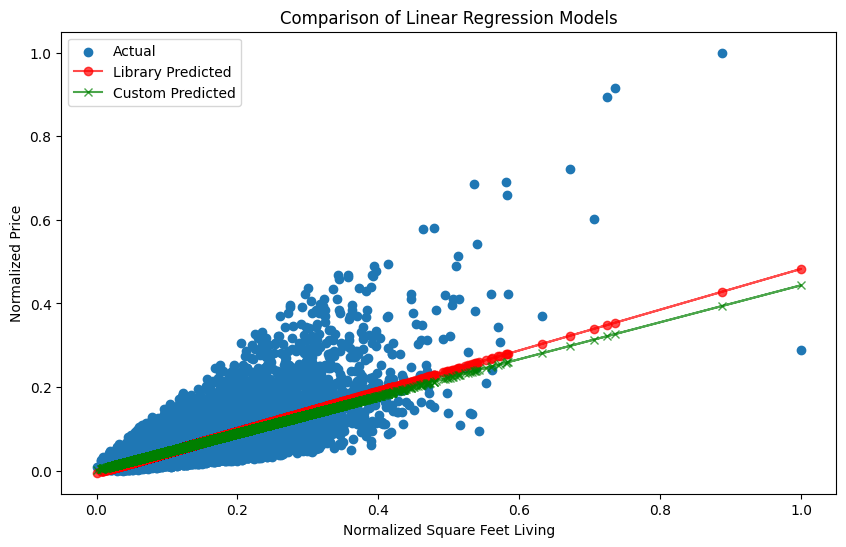

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized, y_normalized, label='Actual')
plt.plot(X_normalized, y_pred, color='red', label='Library Predicted', alpha=0.7, marker='o')
plt.plot(X_normalized, y_pred_custom, color='green', label='Custom Predicted', alpha=0.7, marker='x')
plt.xlabel('Normalized Square Feet Living')
plt.ylabel('Normalized Price')
plt.title('Comparison of Linear Regression Models')
plt.legend()
plt.show()